<a href="https://colab.research.google.com/github/Zzero76/Machine-learning/blob/main/6%2C7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from scipy.stats import randint as sp_randint
from sklearn.metrics import mean_squared_error, r2_score
import time

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Zzero76/Machine-learning/main/123.csv")
df = df.drop(columns=['E','F'])
X = df.drop(columns=['AH'])
y = df['AH']


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = RandomForestRegressor(random_state=42)

param_grid = {'n_estimators': [50, 100, 200],'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],'min_samples_split': [2, 5, 10]}

# Perform Grid Search
start_time = time.time()
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
grid_time = time.time() - start_time

# Evaluate Grid Search model
grid_predictions = grid_search.predict(X_test)
grid_mse = mean_squared_error(y_test, grid_predictions)
grid_r2 = r2_score(y_test, grid_predictions)

# Randomized search setup
from scipy.stats import randint as sp_randint

param_dist = {'n_estimators': sp_randint(50, 200),'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 50],'min_samples_split': sp_randint(2, 11)}

# Perform Randomized Search
start_time = time.time()
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, verbose=2, random_state=42)
random_search.fit(X_train, y_train)
random_time = time.time() - start_time

# Evaluate Randomized Search model
random_predictions = random_search.predict(X_test)
random_mse = mean_squared_error(y_test, random_predictions)
random_r2 = r2_score(y_test, random_predictions)

# Print results
print("Grid Search best parameters:", grid_search.best_params_)
print("Random Search best parameters:", random_search.best_params_)
print("\nGrid Search - MSE: {:.4f}, R²: {:.4f}, Time: {:.2f} seconds".format(grid_mse, grid_r2, grid_time))
print("Randomized Search - MSE: {:.4f}, R²: {:.4f}, Time: {:.2f} seconds".format(random_mse, random_r2, random_time))

Fitting 5 folds for each of 108 candidates, totalling 540 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Grid Search best parameters: {'max_depth': 10, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 200}
Random Search best parameters: {'max_depth': 30, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 177}

Grid Search - MSE: 47.3163, R²: 0.6621, Time: 99.43 seconds
Randomized Search - MSE: 46.3645, R²: 0.6689, Time: 94.16 seconds


Mean Squared Error: 47.8615
R² Score: 0.6582


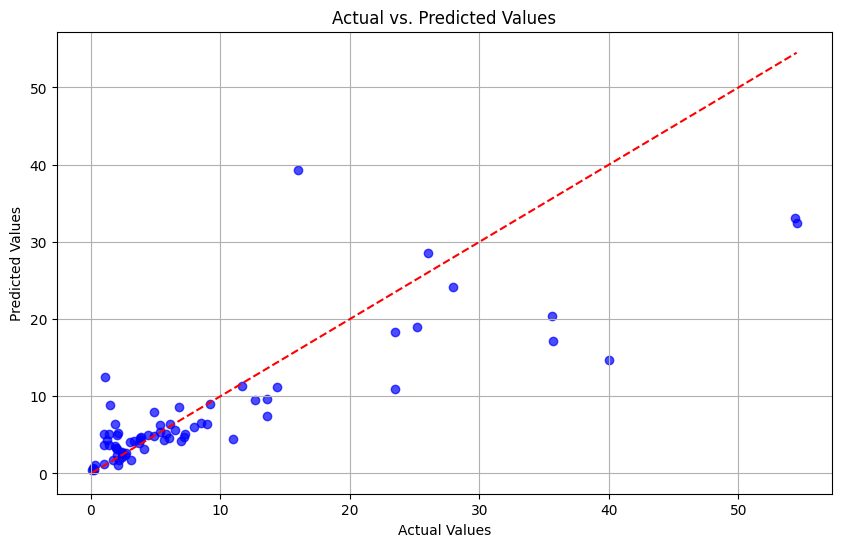

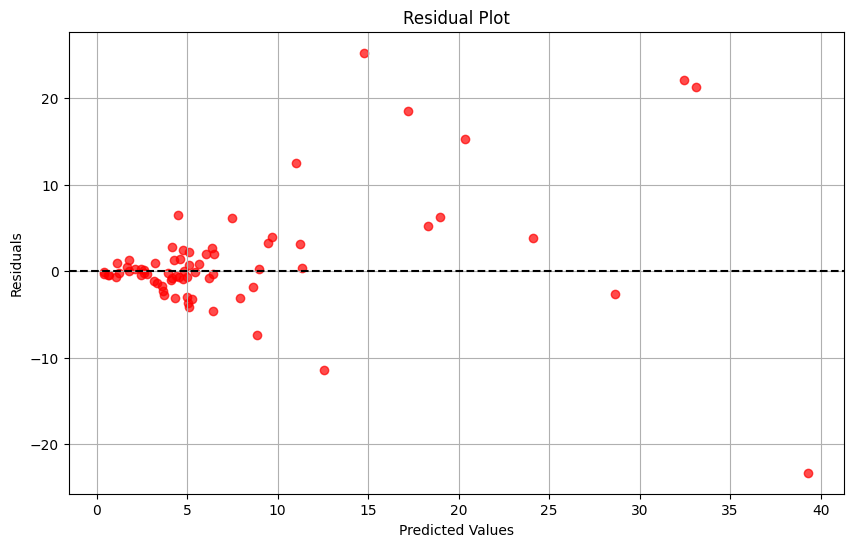

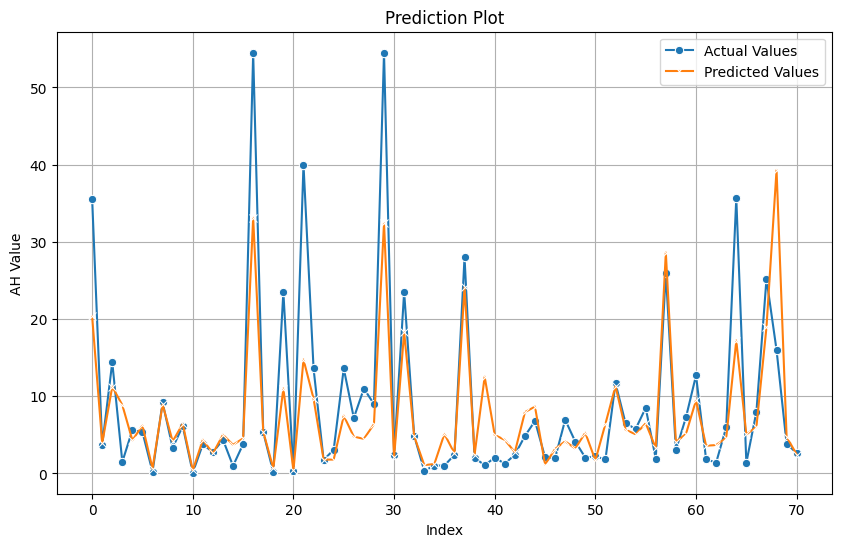

In [4]:
best_params = {
    'n_estimators': 100,
    'max_features': 'sqrt',
    'max_depth': 30,
    'min_samples_split': 2
}

# Rebuild the model using the optimized hyperparameters
model = RandomForestRegressor(**best_params, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Performance evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# Visualizing the results

# Scatter plot of Actual vs. Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Ideal line where predicted = actual
plt.show()

# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7, color='red')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

# Prediction Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=y_test.reset_index(drop=True), label="Actual Values", marker='o')
sns.lineplot(data=pd.Series(y_pred, index=y_test.index).reset_index(drop=True), label="Predicted Values", marker='x')
plt.title('Prediction Plot')
plt.xlabel('Index')
plt.ylabel('AH Value')
plt.legend()
plt.grid(True)
plt.show()